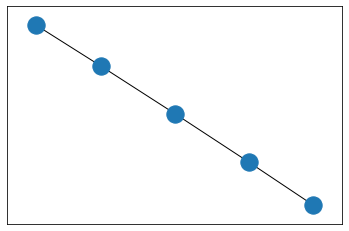

In [58]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.path_graph(5)
attrs = {0: {'attr1': 20, 'attr2': 'nothing'}, 1: {'attr2': 3}, 2: {'attr1': 42}, 3: {'attr3': 'hello'}, 4: {'attr1': 54, 'attr3': '33'}}
nx.set_node_attributes(G, attrs)

fig, ax = plt.subplots()
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):
    node = ind["ind"][0]
    xy = pos[node]
    annot.xy = xy
    node_attr = {'node': node}
    node_attr.update(G.nodes[node])
    text = '\n'.join(f'{k}: {v}' for k, v in node_attr.items())
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = nodes.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [56]:
import networkx as nx
from bokeh.plotting import figure, curdoc, from_networkx
from bokeh.models import HoverTool
from bokeh.io import output_notebook, show, save

g = nx.Graph()
g.add_nodes_from([(4,{'sheet':1}),
(5,{"sheet":2}),
(6,{"sheet":3}),
(7,{"sheet":4})])

g.add_edges_from([(4,5,{'weight':4, 'delay':1}),
(5,6,{'weight':1, 'delay':1}),
(4,6,{'weight':2, 'delay':1}),
(6,7,{'weight':3, 'delay':1})])



graph_renderer = from_networkx(g,nx.spring_layout(g))
TOOLTIPS=[("index", "@sheet")]
plot = figure(tooltips = TOOLTIPS,x_range=(1,4), y_range=(0,3),
tools="lasso_select,pan,wheel_zoom")

hover_edges = HoverTool(
tooltips=[('weight','@weight'),('delay','@delay')],
renderers=[graph_renderer.edge_renderer], line_policy="interp"
)

plot.renderers.append(graph_renderer)
plot.add_tools(hover_edges)
show(plot)

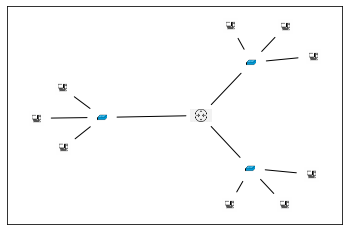

In [59]:
import matplotlib.pyplot as plt
import networkx as nx
import PIL

# Image URLs for graph nodes
icons = {
    "router": "D:/User/Desktop/vita/icons/router.png",
    "switch": "D:/User/Desktop/vita/icons/switch.png",
    "PC": "D:/User/Desktop/vita/icons/host.png",
}

# Load images
images = {k: PIL.Image.open(fname) for k, fname in icons.items()}

# Generate the computer network graph
G = nx.Graph()

G.add_node("router", image=images["router"])
for i in range(1, 4):
    G.add_node(f"switch_{i}", image=images["switch"])
    for j in range(1, 4):
        G.add_node("PC_" + str(i) + "_" + str(j), image=images["PC"])

G.add_edge("router", "switch_1")
G.add_edge("router", "switch_2")
G.add_edge("router", "switch_3")
for u in range(1, 4):
    for v in range(1, 4):
        G.add_edge("switch_" + str(u), "PC_" + str(u) + "_" + str(v))

# Get a reproducible layout and create figure
pos = nx.spring_layout(G, seed=1734289230)
fig, ax = plt.subplots()

# Note: the min_source/target_margin kwargs only work with FancyArrowPatch objects.
# Force the use of FancyArrowPatch for edge drawing by setting `arrows=True`,
# but suppress arrowheads with `arrowstyle="-"`
nx.draw_networkx_edges(
    G,
    pos=pos,
    ax=ax,
    arrows=True,
    arrowstyle="-",
    min_source_margin=15,
    min_target_margin=15,
)

# Transform from data coordinates (scaled between xlim and ylim) to display coordinates
tr_figure = ax.transData.transform
# Transform from display to figure coordinates
tr_axes = fig.transFigure.inverted().transform

# Select the size of the image (relative to the X axis)
icon_size = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
icon_center = icon_size / 2.0

# Add the respective image to each node
for n in G.nodes:
    xf, yf = tr_figure(pos[n])
    xa, ya = tr_axes((xf, yf))
    # get overlapped axes and plot icon
    a = plt.axes([xa - icon_center, ya - icon_center, icon_size, icon_size])
    a.imshow(G.nodes[n]["image"])
    a.axis("off")
plt.show()